In [1]:
# Plots in this notebook may be compared with fig. 4 in Olveira et al. (2019)

In [2]:
from brian2 import figure, grid, axhline, xlabel, ylabel, plot, legend, title, subplot, zeros, ones, arange, xticks, xlim, ylim
%matplotlib inline

In [3]:
from scipy.optimize import curve_fit
import numpy as np

def func_b(b, k1, k2):
    return k1 * b ** k2

def func_a(a, k1, k2):
    return func_b(a, k1, k2)

In [4]:
# Results from constant subthreshold oscillation rates for single neurons
b = [0.60, 0.57, 0.54, 0.51, 0.48, 0.45, 0.42, 0.39, 0.36, 0.33, 0.30, 0.27]
a40 = [0.01355, 0.0148, 0.0162, 0.018, 0.0202, 0.0231, 0.0268, 0.032, 0.0396, 0.052, 0.0767, 0.188]
a20 = [0.00612, 0.00662, 0.00723, 0.00795, 0.00885, 0.0101,0.0116, 0.0135, 0.0164, 0.0208, 0.0289, 0.0538]
a10 = [0.00285, 0.00310, 0.00337, 0.00374, 0.00414, 0.00464, 0.00534, 0.00624, 0.00745, 0.0093, 0.0126, 0.0214]
a5 = [0.0014, 0.00154, 0.00167, 0.00182, 0.002, 0.0022, 0.0025, 0.0029, 0.0035, 0.0043, 0.00575, 0.0097]

In [5]:
popt1, pcov1 = curve_fit(func_b, b, a5)
popt2, pcov2 = curve_fit(func_b, b, a20)
popt3, pcov3 = curve_fit(func_b, b, a40)

popt1_inverse, pcov1_inverse = curve_fit(func_a, a5, b)
popt2_inverse, pcov2_inverse = curve_fit(func_a, a20, b)
popt3_inverse, pcov3_inverse = curve_fit(func_a, a40, b)

In [6]:
func_b(b, *popt1)

array([0.0009098 , 0.00105267, 0.00122763, 0.0014443 , 0.00171605,
       0.00206175, 0.00250867, 0.00309718, 0.00388884, 0.00498059,
       0.00653115, 0.00881274])

$a=f(b)=0.000213 b^{-2.8437}$
[ 2.12848021e-04 -2.84371878e+00]


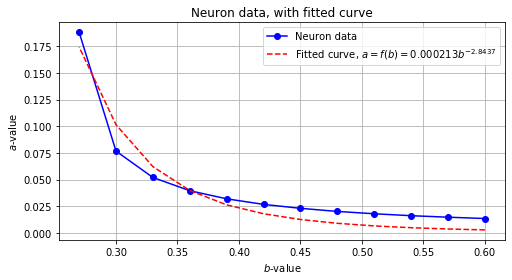

In [7]:
figure(figsize=(8,4))
plot(b, a40, 'b-o')
plot(b, func_b(b, *popt3), 'r--')
grid(True)
xlabel('$b$-value')
ylabel('$a$-value')
legend(['Neuron data', 'Fitted curve, '+
       '$a=f(b)='+"{:f}".format(popt1[0])+' b^{'
      +"{:5.4f}".format(popt1[1])
#       +' + ' + "{:3.2f}".format(popt1[2])+
        +'}$']);
print('$a=f(b)='+"{:f}".format(popt1[0])+' b^{'
      +"{:5.4f}".format(popt1[1])
#       +' + ' + "{:3.2f}".format(popt1[2])+
        +'}$')
title('Neuron data, with fitted curve');
print(popt1)

$b=f(a)=0.02a^{-0.48}$


array([ 0.02440013, -0.48220403])

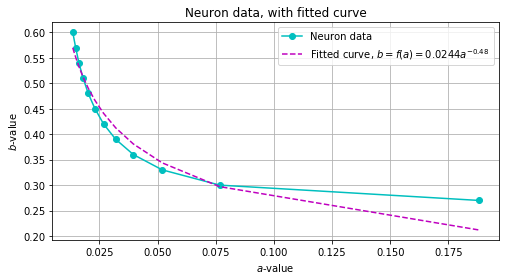

In [8]:
figure(figsize=(8,4))
plot(a40, b, 'c-o')
plot(a40, func_a(a40, *popt3_inverse), 'm--')
grid(True)
xlabel('$a$-value')
ylabel('$b$-value')
legend(['Neuron data', 'Fitted curve, '+
       '$b=f(a)='+"{:5.4f}".format(popt1_inverse[0])+'a^{'
      +"{:3.2f}".format(popt1_inverse[1])+'}$']);
print('$b=f(a)='+"{:3.2f}".format(popt1_inverse[0])+'a^{'
      +"{:3.2f}".format(popt1_inverse[1])+'}$')
title('Neuron data, with fitted curve');
popt1_inverse

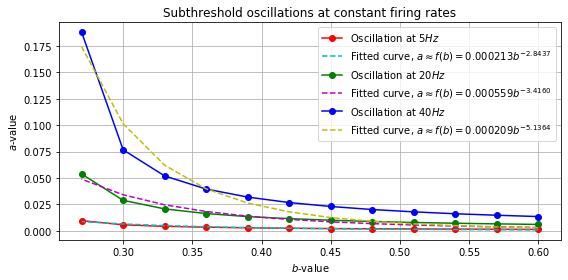

In [9]:
figure(figsize=(9,4))

plot(b, a5, 'r-o')
plot(b, func_b(b, *popt1), 'c--')
plot(b, a20, 'g-o')
plot(b, func_b(b, *popt2), 'm--')
plot(b, a40, 'b-o')
plot(b, func_b(b, *popt3), 'y--')
# plot(b, test_a, 'k-*')
grid(True)
xlabel('$b$-value')
ylabel('$a$-value')
leg1 = 'Fitted curve, '+r'$a \approx f(b)='+"{:f}".format(popt1[0])+' b^{'+"{:5.4f}".format(popt1[1])+'}$';
leg2 = 'Fitted curve, '+r'$a \approx f(b)='+"{:f}".format(popt2[0])+' b^{'+"{:5.4f}".format(popt2[1])+'}$';
leg3 = 'Fitted curve, '+r'$a \approx f(b)='+"{:f}".format(popt3[0])+' b^{'+"{:5.4f}".format(popt3[1])+'}$';
legend([
    'Oscillation at $5 Hz$', leg1,
       'Oscillation at $20 Hz$', leg2,
       'Oscillation at $40 Hz$', leg3
]);
title('Subthreshold oscillations at constant firing rates');

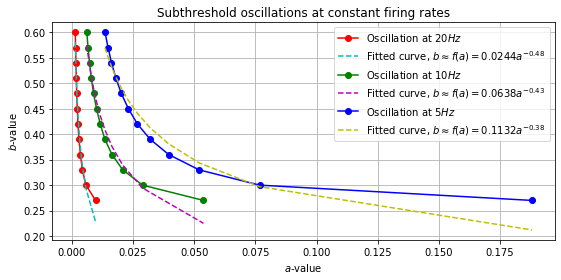

In [10]:
figure(figsize=(9,4)) # may be compared with fig. 4 in Olveira et al. (2019)

plot(a5, b, 'r-o')
plot(a5, func_a(a5, *popt1_inverse), 'c--')
plot(a20, b, 'g-o')
plot(a20, func_a(a20, *popt2_inverse), 'm--')
plot(a40, b, 'b-o')
plot(a40, func_a(a40, *popt3_inverse), 'y--')
# plot(b, test_a, 'k-*')
grid(True)
xlabel('$a$-value')
ylabel('$b$-value')
leg1 = 'Fitted curve, '+r'$b \approx f(a)='+"{:5.4f}".format(popt1_inverse[0])+'a^{'+"{:3.2f}".format(popt1_inverse[1])+'}$';
leg2 = 'Fitted curve, '+r'$b \approx f(a)='+"{:5.4f}".format(popt2_inverse[0])+'a^{'+"{:3.2f}".format(popt2_inverse[1])+'}$';
leg3 = 'Fitted curve, '+r'$b \approx f(a)='+"{:5.4f}".format(popt3_inverse[0])+'a^{'+"{:3.2f}".format(popt3_inverse[1])+'}$';
legend([
    'Oscillation at $20 Hz$', 
    leg1,
       'Oscillation at $10 Hz$', 
    leg2,
       'Oscillation at $5 Hz$', 
    leg3
]);
title('Subthreshold oscillations at constant firing rates');